<a href="https://www.kaggle.com/code/amulyat29/multi-class-prediction-obesity-risk?scriptVersionId=161485962" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e2/sample_submission.csv
/kaggle/input/playground-series-s4e2/train.csv
/kaggle/input/playground-series-s4e2/test.csv


# Importing Libraries

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import mean, std
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Loading Data

In [3]:
train_data = pd.read_csv('/kaggle/input/playground-series-s4e2/train.csv')
test_data = pd.read_csv('/kaggle/input/playground-series-s4e2/test.csv')

# Exploratory Data Analysis(EDA)

## Understanding the data

In [4]:
print("Shape of train data: ", train_data.shape)
print("Shape of test data: ", test_data.shape)

Shape of train data:  (20758, 18)
Shape of test data:  (13840, 17)


In [5]:
train_data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [6]:
test_data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [7]:
train_data.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


## Checking for null values

In [8]:
train_data.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [9]:
test_data.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64

There are no missing values in either the train data or the test data.

## Removing duplicates 

In [10]:
train_data.drop_duplicates(inplace = True, keep = 'first')
print(train_data.shape)

(20758, 18)


There are no duplicate rows in the train data.

## Univariate Analysis 

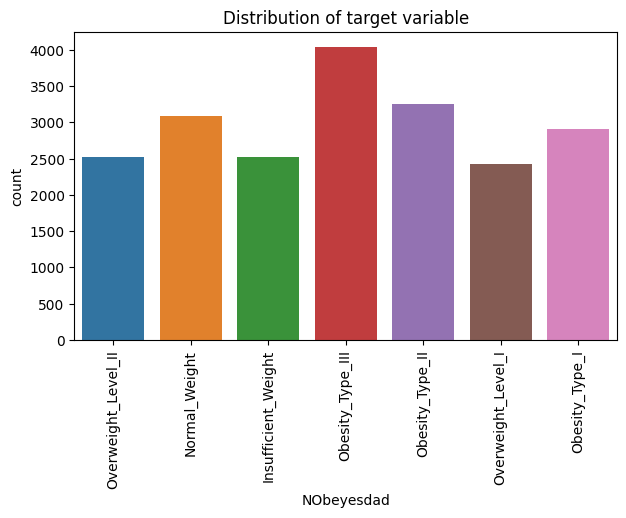

In [11]:
plt.figure(figsize = (7, 4))
sns.countplot(data = train_data, x = "NObeyesdad")
plt.title("Distribution of target variable")
plt.xticks(rotation='vertical')
plt.show()


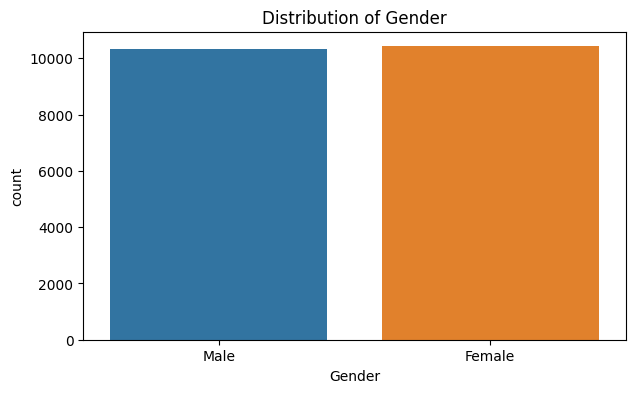

In [12]:
plt.figure(figsize = (7, 4))
sns.countplot(data = train_data, x = "Gender")
plt.title("Distribution of Gender")
plt.show()


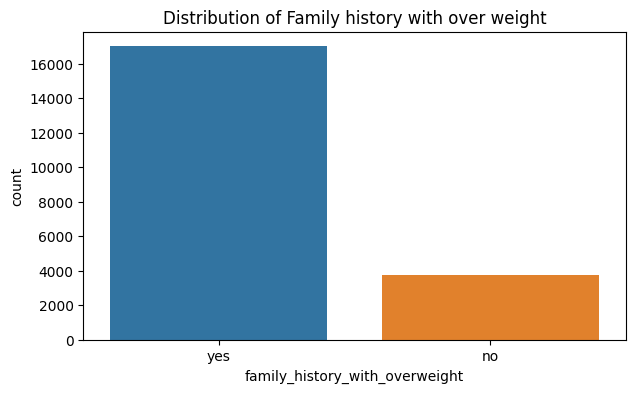

In [13]:
plt.figure(figsize = (7, 4))
sns.countplot(data = train_data, x = "family_history_with_overweight")
plt.title("Distribution of Family history with over weight")
plt.show()

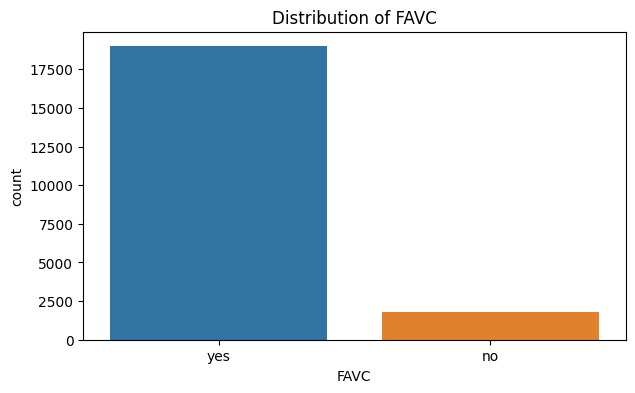

In [14]:
plt.figure(figsize = (7, 4))
sns.countplot(data = train_data, x = "FAVC")
plt.title("Distribution of FAVC")
plt.show()

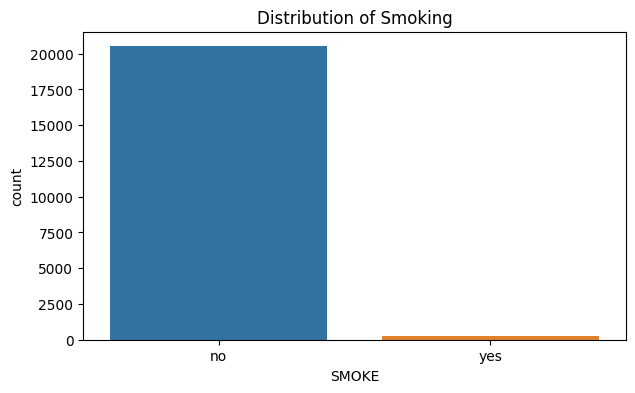

In [15]:
plt.figure(figsize = (7, 4))
sns.countplot(data = train_data, x = "SMOKE")
plt.title("Distribution of Smoking")
plt.show()

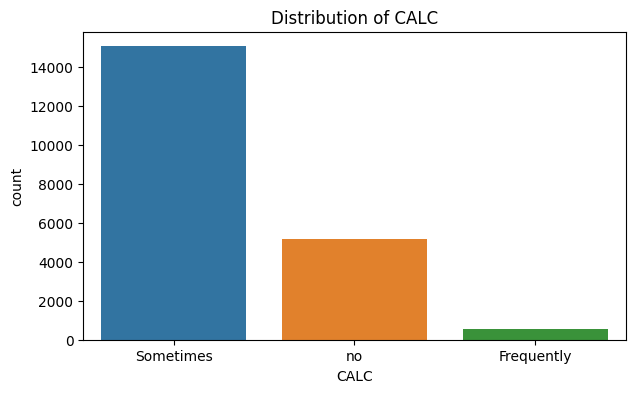

In [16]:
plt.figure(figsize = (7, 4))
sns.countplot(data = train_data, x = "CALC")
plt.title("Distribution of CALC")
plt.show()

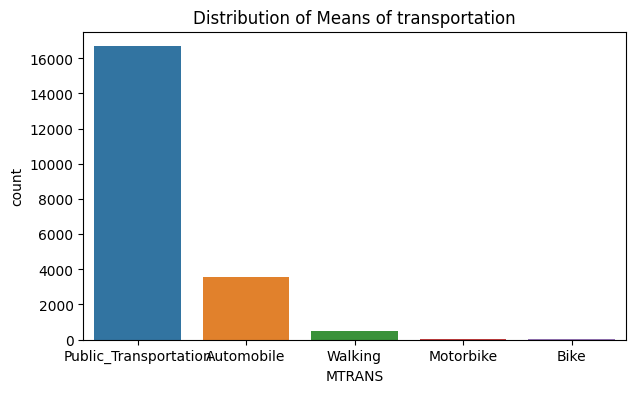

In [17]:
plt.figure(figsize = (7, 4))
sns.countplot(data = train_data, x = "MTRANS")
plt.title("Distribution of Means of transportation")
plt.show()

## Bivariate Analysis 

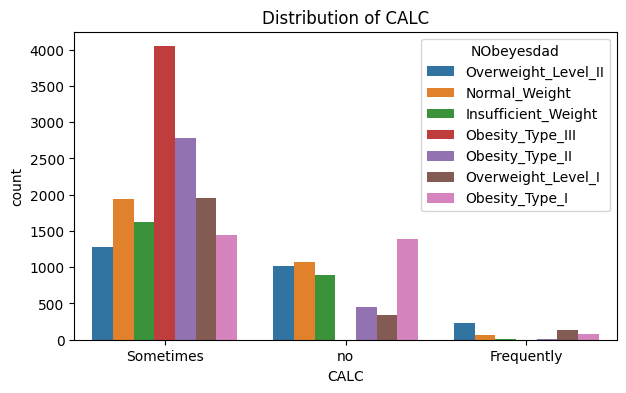

In [18]:
plt.figure(figsize = (7, 4))
sns.countplot(data = train_data, x = "CALC", hue = "NObeyesdad")
plt.title("Distribution of CALC")
plt.show()

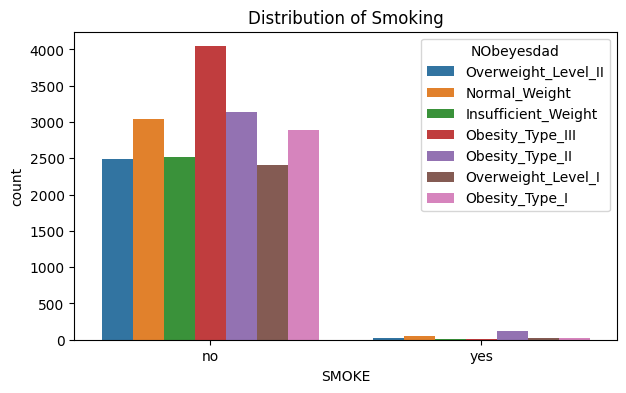

In [19]:
plt.figure(figsize = (7, 4))
sns.countplot(data = train_data, x = "SMOKE", hue = "NObeyesdad")
plt.title("Distribution of Smoking")
plt.show()

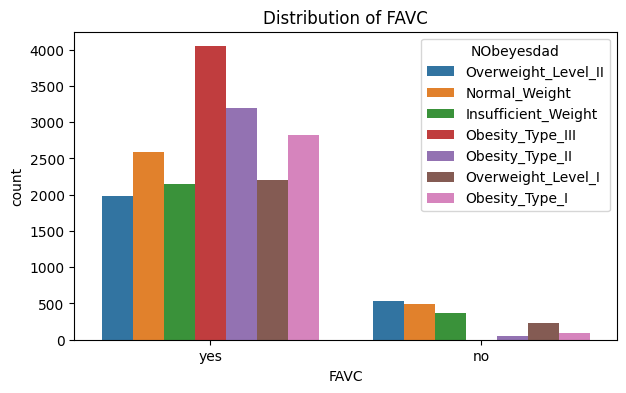

In [20]:
plt.figure(figsize = (7, 4))
sns.countplot(data = train_data, x = "FAVC", hue = "NObeyesdad")
plt.title("Distribution of FAVC")
plt.show()

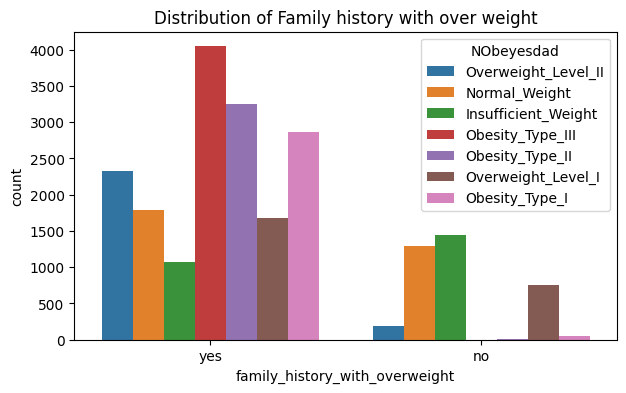

In [21]:
plt.figure(figsize = (7, 4))
sns.countplot(data = train_data, x = "family_history_with_overweight", hue = "NObeyesdad")
plt.title("Distribution of Family history with over weight")
plt.show()

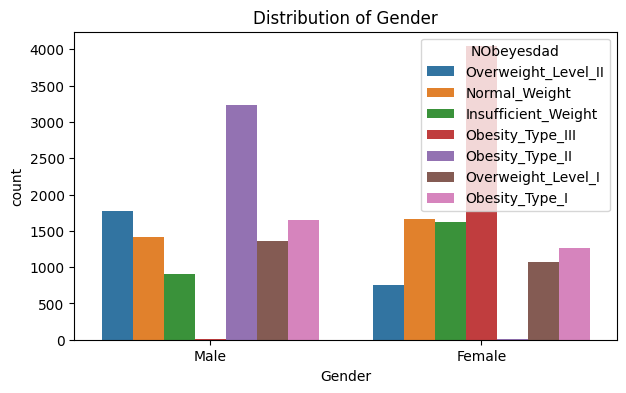

In [22]:
plt.figure(figsize = (7, 4))
sns.countplot(data = train_data, x = "Gender", hue = "NObeyesdad")
plt.title("Distribution of Gender")
plt.show()

<Axes: >

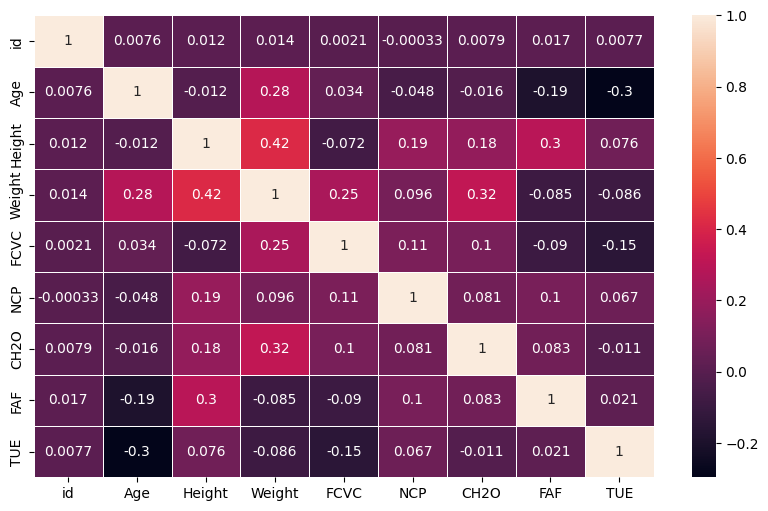

In [23]:
numerical_features = train_data.select_dtypes(exclude = 'object').columns
categorical_features = train_data.select_dtypes(include = 'object').columns
plt.figure(figsize = (10,6))
sns.heatmap(data = train_data[numerical_features].corr(), annot = True, linewidth = 0.5)

## Encoding Categorical features 

In [24]:
encoder = LabelEncoder()
categorical_features = train_data.select_dtypes(include = 'object' ).columns
print("Categorical features: ", categorical_features)
categorical_features = categorical_features.drop('NObeyesdad')
print("Categorical features: ", categorical_features)
for feature in categorical_features:
    train_data[feature] = encoder.fit_transform(train_data[feature])

Categorical features:  Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')
Categorical features:  Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS'],
      dtype='object')


In [25]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  int64  
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  int64  
 6   FAVC                            20758 non-null  int64  
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  int64  
 10  SMOKE                           20758 non-null  int64  
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [26]:
for feature in categorical_features:
    test_data[feature] = encoder.fit_transform(test_data[feature])

In [27]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13840 entries, 0 to 13839
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13840 non-null  int64  
 1   Gender                          13840 non-null  int64  
 2   Age                             13840 non-null  float64
 3   Height                          13840 non-null  float64
 4   Weight                          13840 non-null  float64
 5   family_history_with_overweight  13840 non-null  int64  
 6   FAVC                            13840 non-null  int64  
 7   FCVC                            13840 non-null  float64
 8   NCP                             13840 non-null  float64
 9   CAEC                            13840 non-null  int64  
 10  SMOKE                           13840 non-null  int64  
 11  CH2O                            13840 non-null  float64
 12  SCC                             

# Preprocessing the data 

In [28]:
X = train_data.drop(['id', 'NObeyesdad'], axis = 1)
y= train_data['NObeyesdad']
X.shape, y.shape

((20758, 16), (20758,))

In [29]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [30]:
encoder.inverse_transform(y)

array(['Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight', ...,
       'Obesity_Type_II', 'Overweight_Level_II', 'Obesity_Type_II'],
      dtype=object)

## Splitting the data into train and validation sets

In [31]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size =0.2, random_state = 123)
print("Shape of training data: ", X_train.shape, y_train.shape)
print("Shape of validation data", X_val.shape, y_val.shape)

Shape of training data:  (16606, 16) (16606,)
Shape of validation data (4152, 16) (4152,)


## Feature Scaling

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)

# Modelling the data

In [33]:
# Create a list of classifiers to train
classifiers = [
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    LogisticRegression(),
    SVC(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    XGBClassifier(),
    LGBMClassifier(),
    CatBoostClassifier(verbose = False),
]

results_list = []

# Train and evaluate each classifier
for classifier in classifiers:
    classifier_name = classifier.__class__.__name__
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    results_list.append({'Model': classifier_name, 'Accuracy': accuracy})
results = pd.DataFrame(results_list)
print(results)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005433 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2024
[LightGBM] [Info] Number of data points in the train set: 16606, number of used features: 16
[LightGBM] [Info] Start training from score -2.101236
[LightGBM] [Info] Start training from score -1.896277
[LightGBM] [Info] Start training from score -1.963467
[LightGBM] [Info] Start training from score -1.858492
[LightGBM] [Info] Start training from score -1.637901
[LightGBM] [Info] Start training from score -2.155878
[LightGBM] [Info] Start training from score -2.111132
                        Model  Accuracy
0      RandomForestClassifier  0.894750
1  GradientBoostingClassifier  0.904624
2          AdaBoostClassifier  0.406069
3          LogisticRegression  0.852601
4                         SVC  0.856696
5        KNeighborsClassifier

# Submission

In [34]:
best_model = CatBoostClassifier(verbose = False)
X = sc.transform(X)
best_model.fit(X,y)

In [35]:
X_test = test_data.drop('id', axis = 1)

In [36]:
# Feature Scaling
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

In [37]:
y_pred = best_model.predict(X_test)
y.shape

(20758,)

In [38]:
y_pred = np.reshape(y_pred, (len(y_pred),))

In [39]:
predictions = encoder.inverse_transform(y_pred)

In [40]:
predictions

array(['Obesity_Type_II', 'Overweight_Level_I', 'Obesity_Type_III', ...,
       'Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_II'],
      dtype=object)

In [41]:
submission = pd.read_csv("/kaggle/input/playground-series-s4e2/sample_submission.csv")
submission["NObeyesdad"] = predictions
submission.to_csv("submission.csv", index=False)
submission.head()

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
